# Problem Definition

In [1]:
#IMPORTING LIBRARIES:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt                                         
%matplotlib inline

import seaborn as sns
from plotly.subplots import make_subplots
from sklearn import metrics

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [2]:
data=pd.read_csv("avocado.csv")
data.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


# Data Analysis

In [3]:
data.shape
#To find the shape of dataset

(18249, 14)

In [4]:
data.columns
#Number of columns...

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [6]:
data.isnull().sum()
#Che

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [7]:
data.dtypes
#Checking the types of data..

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [8]:
data.drop('Unnamed: 0',inplace=True,axis=1)
#Since its like a serial number we no need this column which disturb our focus..

In [9]:
data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [10]:
data.skew()
#Checking skewness...

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

<AxesSubplot:>

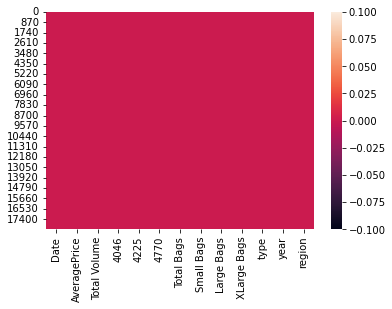

In [11]:
sns.heatmap(data.isnull())

# EDA

# Visualisation 

conventional    9126
organic         9123
Name: type, dtype: int64


<AxesSubplot:xlabel='type', ylabel='count'>

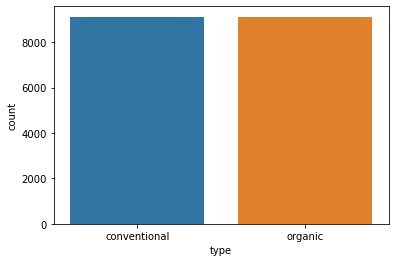

In [12]:
print(data['type'].value_counts())
sns.countplot(x='type',data=data)

In [13]:
data.type.value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

<AxesSubplot:xlabel='year', ylabel='count'>

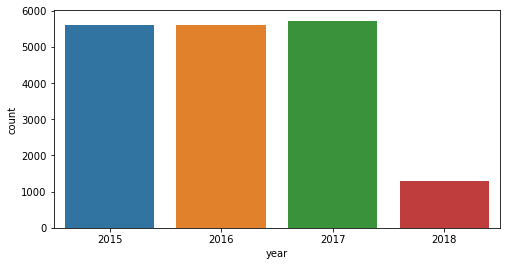

In [14]:
plt.figure(figsize=(8,4))
sns.countplot(data.year)

In [15]:
data.year.value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

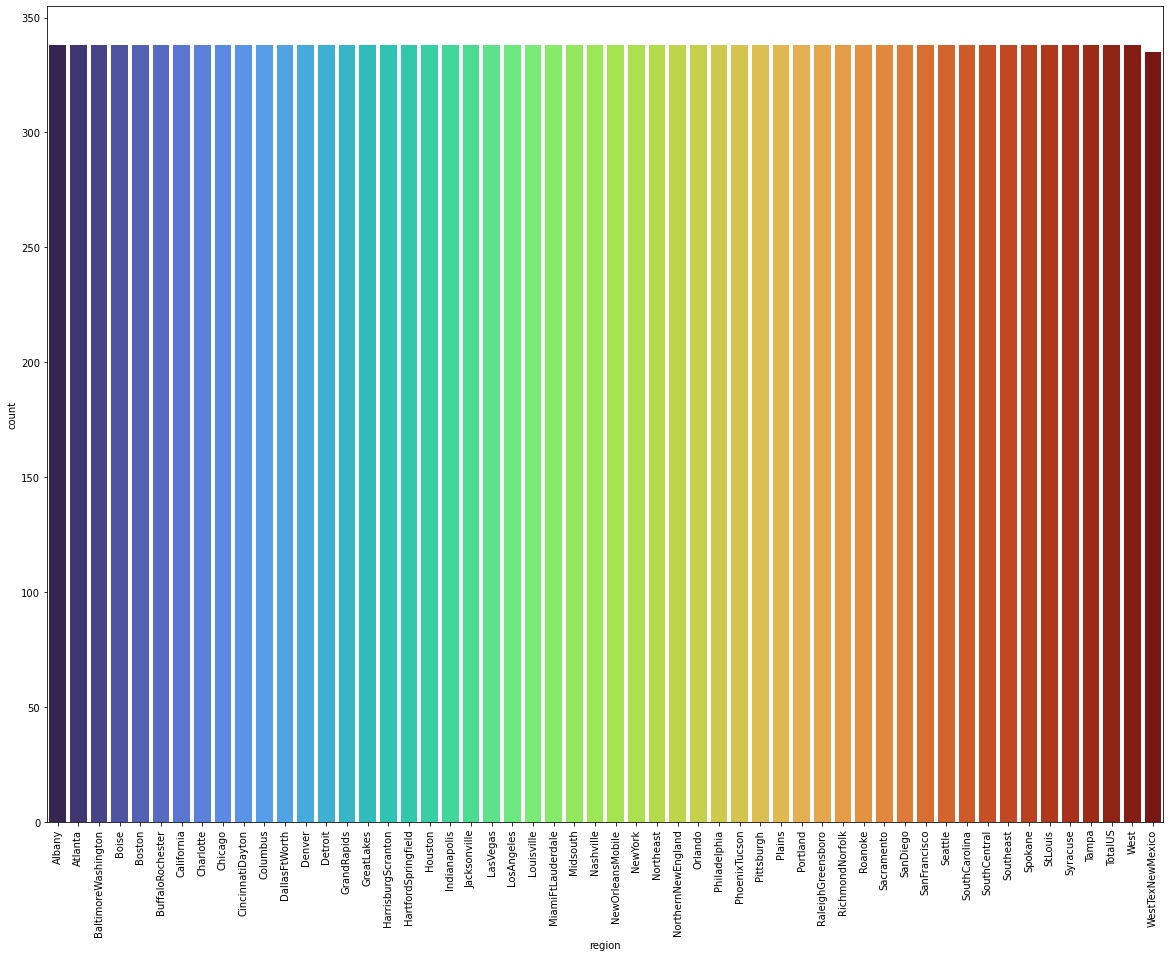

In [16]:
print(data['region'].value_counts())
plt.figure(figsize=(20,15))
sns.countplot(x='region',data=data,palette='turbo')
plt.xticks(rotation=90)
plt.show()

array([[<AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>],
       [<AxesSubplot:title={'center':'4225'}>,
        <AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>],
       [<AxesSubplot:title={'center':'Small Bags'}>,
        <AxesSubplot:title={'center':'Large Bags'}>,
        <AxesSubplot:title={'center':'XLarge Bags'}>],
       [<AxesSubplot:title={'center':'year'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

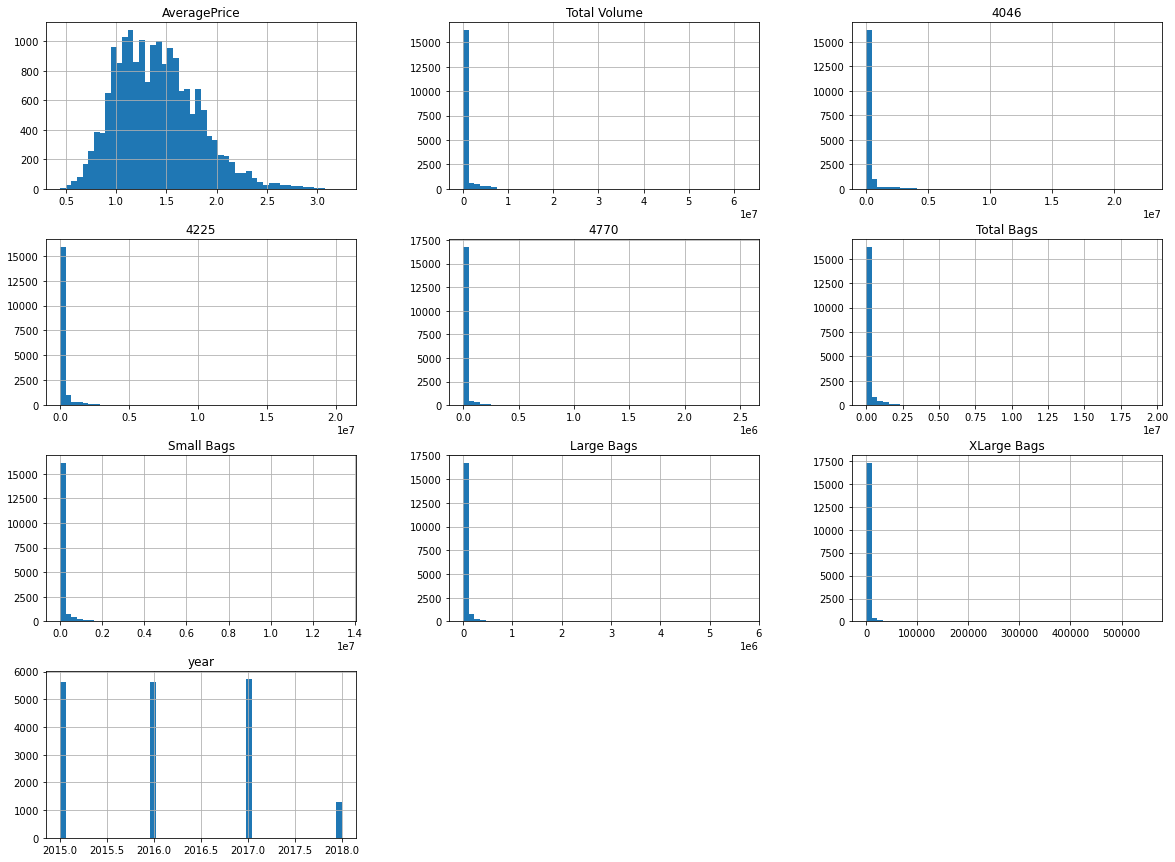

In [17]:
data.hist(bins=50, figsize=(20,15))

In [18]:
data['Year'],data['month'],data['day']=data['Date'].str.split('-').str
#Splitting Date into three different columns

In [19]:
data['Year']=data['Year'].astype(int)
data['month']=data['month'].astype(int)
data['day']=data['day'].astype(int)

In [20]:
data.drop(['year','Date'],axis=1,inplace=True)

In [21]:
data.sample(10)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,month,day
13366,1.68,1388.50,737.02,0.00,0.00,651.48,641.48,10.00,0.00,organic,NewOrleansMobile,2016,6,5
16016,1.48,5325.80,31.72,265.21,0.00,5028.87,5024.43,4.44,0.00,organic,MiamiFtLauderdale,2017,12,10
3978,0.85,3258184.45,1295216.97,655947.51,105879.74,1201140.23,1091515.32,84463.35,25161.56,conventional,LosAngeles,2016,6,26
1017,1.28,155730.59,16121.10,80781.48,10648.98,48179.03,30541.64,15866.46,1770.93,conventional,Indianapolis,2015,6,7
1785,1.37,74510.02,1493.60,40727.85,3632.29,28656.28,20079.07,8573.41,3.80,conventional,Pittsburgh,2015,8,30
3956,1.01,2257271.18,865743.41,416437.85,50949.95,924139.97,868269.44,34138.07,21732.46,conventional,LosAngeles,2016,11,27
6484,1.43,238229.99,42116.11,127782.88,58.29,68272.71,55944.40,9001.64,3326.67,conventional,HarrisburgScranton,2017,8,13
14182,1.69,29440.75,3798.76,7157.62,105.30,18379.07,4761.10,13617.97,0.00,organic,Seattle,2016,9,25
11566,1.81,23809.30,9855.11,3187.02,612.99,10154.18,9640.00,514.18,0.00,organic,Southeast,2015,1,25
9158,1.87,1881.08,19.51,213.43,0.00,1648.14,1648.14,0.00,0.00,organic,Albany,2015,5,17


# DATA PREPROCESSING

# Corelation

<function matplotlib.pyplot.show(close=None, block=None)>

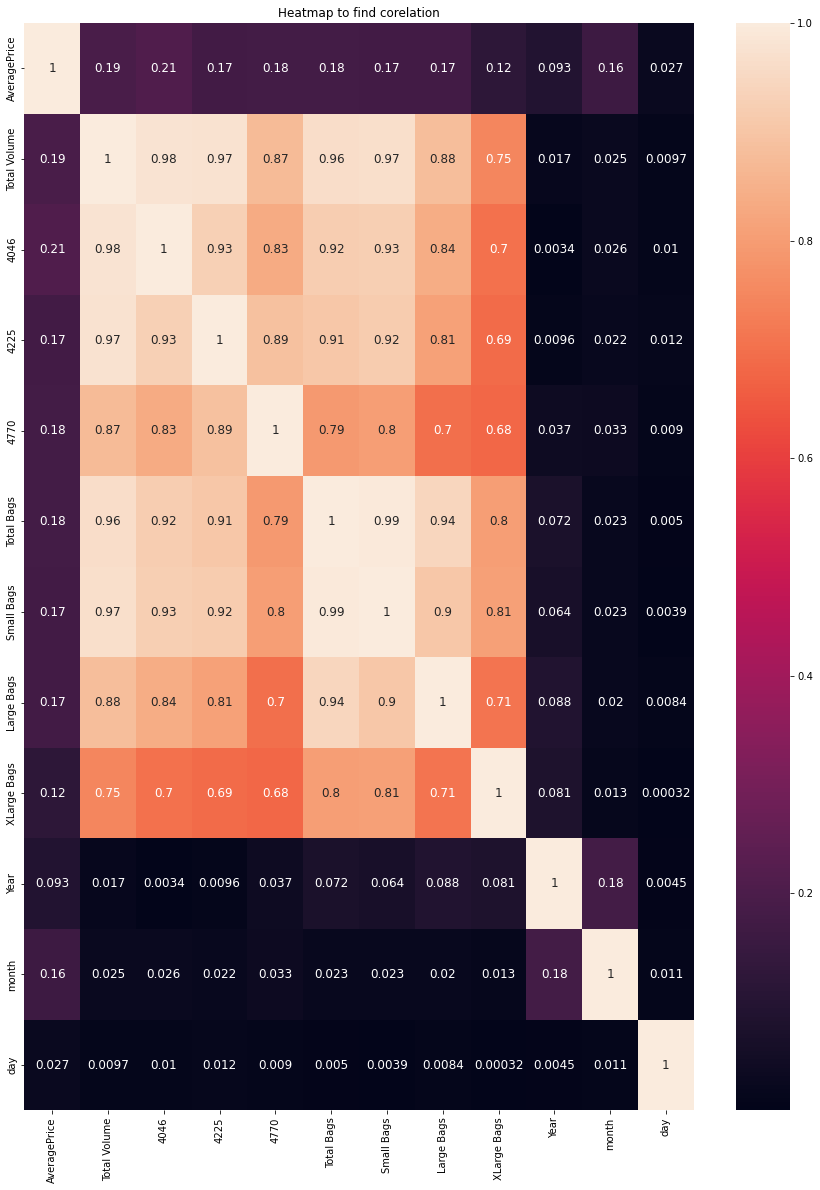

In [22]:
corr=data.corr().abs()
plt.figure(figsize=(15,20))
sns.heatmap(corr,annot=True,annot_kws={'size':12})
plt.title("Heatmap to find corelation")
plt.show

In [23]:
data.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Year,month,day
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197,0.162409,0.027386
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193,-0.024689,-0.009747
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353,-0.025803,-0.010159
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559,-0.022108,-0.012393
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531,-0.033424,-0.009009
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552,-0.022724,-0.004988
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915,-0.023126,-0.003870
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891,-0.020187,-0.008352
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033,-0.012969,0.000319
Year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000,-0.177050,0.004475


In [24]:
data.drop(['4046','4225','4770','Small Bags','Large Bags','XLarge Bags'],axis=1,inplace=True)
#Dropping these columns since they arte highly corealted...

In [25]:
data.head(5)

,AveragePrice,Total Volume,Total Bags,type,region,Year,month,day
0,1.33,64236.62,8696.87,conventional,Albany,2015,12,27
1,1.35,54876.98,9505.56,conventional,Albany,2015,12,20
2,0.93,118220.22,8145.35,conventional,Albany,2015,12,13
3,1.08,78992.15,5811.16,conventional,Albany,2015,12,6
4,1.28,51039.60,6183.95,conventional,Albany,2015,11,29


In [26]:
data.shape

(18249, 8)

In [27]:
data.isnull().sum()

AveragePrice    0
Total Volume    0
Total Bags      0
type            0
region          0
Year            0
month           0
day             0
dtype: int64

# Encoding

In [28]:
from sklearn.preprocessing import OrdinalEncoder

In [29]:
Ord_Enc=OrdinalEncoder()
data['type']=Ord_Enc.fit_transform(data['type'].values.reshape(-1,1))
data['region']=Ord_Enc.fit_transform(data['region'].values.reshape(-1,1))
data
#Changing the data type of type and region (obj ===> numerical)datas..

,AveragePrice,Total Volume,Total Bags,type,region,Year,month,day
0,1.33,64236.62,8696.87,0.0,0.0,2015,12,27
1,1.35,54876.98,9505.56,0.0,0.0,2015,12,20
2,0.93,118220.22,8145.35,0.0,0.0,2015,12,13
3,1.08,78992.15,5811.16,0.0,0.0,2015,12,6
4,1.28,51039.60,6183.95,0.0,0.0,2015,11,29
...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,13498.67,1.0,53.0,2018,2,4
18245,1.71,13888.04,9264.84,1.0,53.0,2018,1,28
18246,1.87,13766.76,9394.11,1.0,53.0,2018,1,21
18247,1.93,16205.22,10969.54,1.0,53.0,2018,1,14


# outliers

<AxesSubplot:>

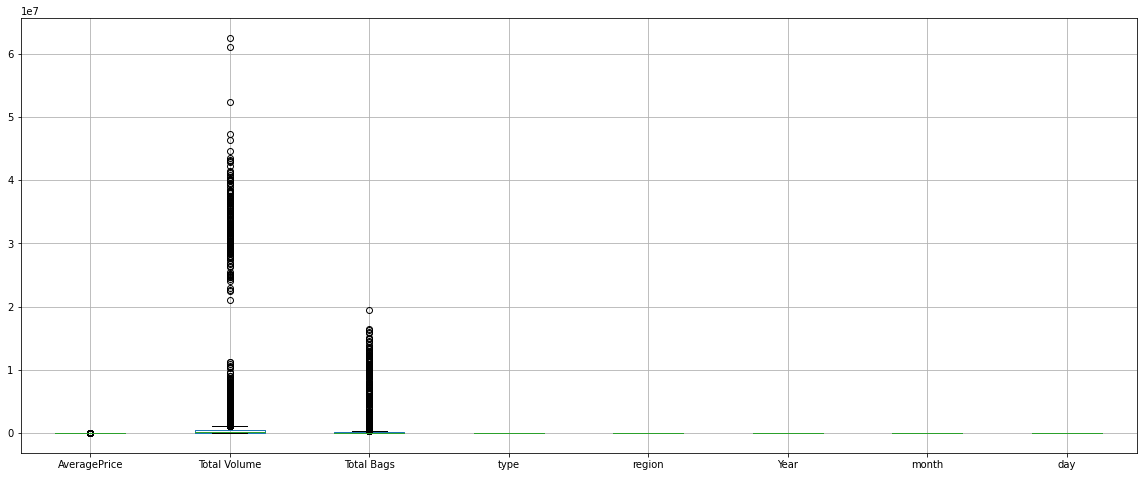

In [30]:
data.boxplot(figsize=(20,8))

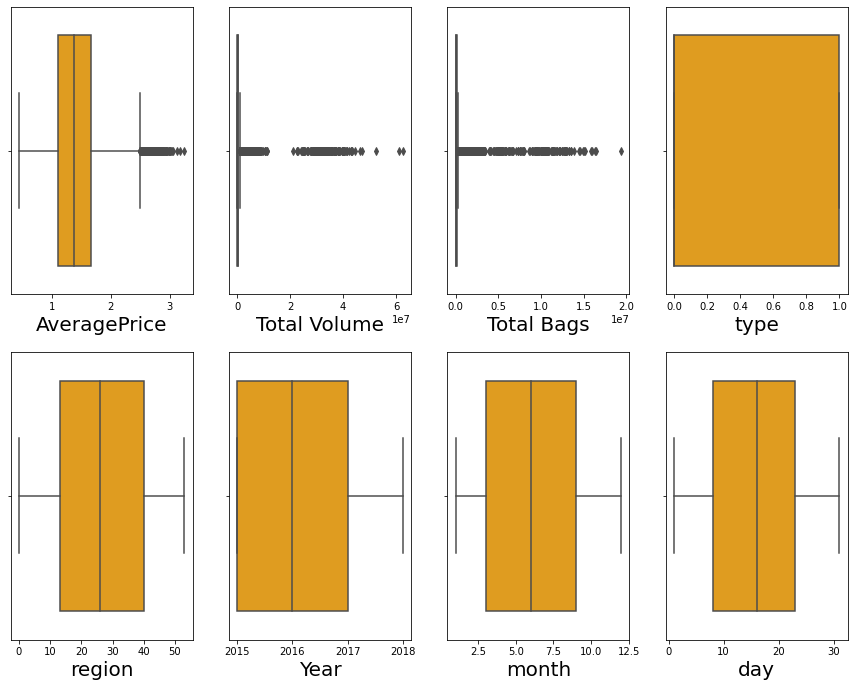

In [31]:
plt.figure(figsize=(15,18), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=18:
        ax = plt.subplot(3,4,plotnumber)
        sns.boxplot(data[column],color='orange')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [32]:
from scipy.stats import zscore
z=np.abs(zscore(data))
z

,AveragePrice,Total Volume,Total Bags,type,region,Year,month,day
0,0.188689,0.227716,0.234170,0.999836,1.700252,1.221282,1.647632,1.291857
1,0.139020,0.230427,0.233350,0.999836,1.700252,1.221282,1.647632,0.494231
2,1.182069,0.212085,0.234730,0.999836,1.700252,1.221282,1.647632,0.303396
3,0.809551,0.223444,0.237096,0.999836,1.700252,1.221282,1.647632,1.101022
4,0.312861,0.231538,0.236718,0.999836,1.700252,1.221282,1.364669,1.519750
...,...,...,...,...,...,...,...,...
18244,0.556347,0.241373,0.229301,1.000164,1.700811,1.970504,1.181997,1.328915
18245,0.755023,0.242296,0.233594,1.000164,1.700811,1.970504,1.464959,1.405803
18246,1.152375,0.242331,0.233463,1.000164,1.700811,1.970504,1.464959,0.608177
18247,1.301382,0.241625,0.231866,1.000164,1.700811,1.970504,1.464959,0.189449


In [33]:
threashold=3
print(np.where(z>3))

(array([ 2652,  2652,  2653,  2653,  2654,  2654,  2655,  2655,  2656,
        2656,  2657,  2657,  2658,  2658,  2659,  2659,  2660,  2660,
        2661,  2661,  2662,  2662,  2663,  2663,  2664,  2664,  2665,
        2665,  2666,  2666,  2667,  2667,  2668,  2668,  2669,  2669,
        2670,  2670,  2671,  2671,  2672,  2672,  2673,  2673,  2674,
        2674,  2675,  2675,  2676,  2676,  2677,  2677,  2678,  2678,
        2679,  2679,  2680,  2680,  2681,  2681,  2682,  2682,  2683,
        2683,  2684,  2684,  2685,  2685,  2686,  2686,  2687,  2687,
        2688,  2688,  2689,  2689,  2690,  2690,  2691,  2691,  2692,
        2692,  2693,  2693,  2694,  2694,  2695,  2695,  2696,  2696,
        2697,  2697,  2698,  2698,  2699,  2699,  2700,  2700,  2701,
        2701,  2702,  2702,  2703,  2703,  5460,  5460,  5461,  5461,
        5462,  5462,  5463,  5463,  5464,  5464,  5465,  5465,  5466,
        5466,  5467,  5467,  5468,  5468,  5469,  5469,  5470,  5470,
        5471,  5471

In [34]:
df=data[(z<3).all(axis=1)]
data.shape,df.shape,
(18249-17931)/18249*100

1.7425612362321221

# Skewness

In [35]:
data

,AveragePrice,Total Volume,Total Bags,type,region,Year,month,day
0,1.33,64236.62,8696.87,0.0,0.0,2015,12,27
1,1.35,54876.98,9505.56,0.0,0.0,2015,12,20
2,0.93,118220.22,8145.35,0.0,0.0,2015,12,13
3,1.08,78992.15,5811.16,0.0,0.0,2015,12,6
4,1.28,51039.60,6183.95,0.0,0.0,2015,11,29
...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,13498.67,1.0,53.0,2018,2,4
18245,1.71,13888.04,9264.84,1.0,53.0,2018,1,28
18246,1.87,13766.76,9394.11,1.0,53.0,2018,1,21
18247,1.93,16205.22,10969.54,1.0,53.0,2018,1,14


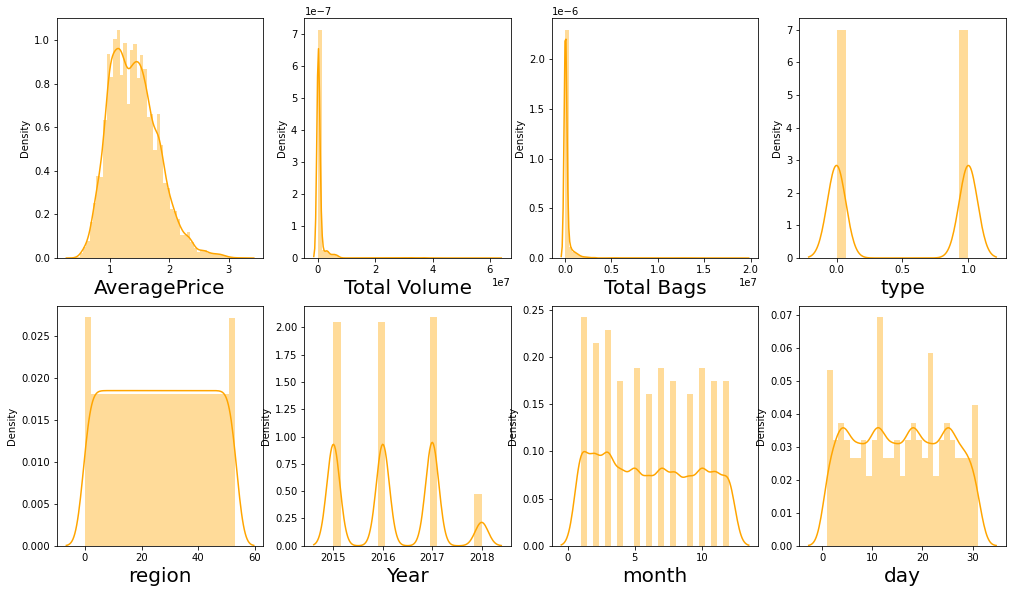

In [36]:
plt.figure(figsize=(17,15), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=18:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(data[column],color='orange')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [37]:
data.skew()

AveragePrice    0.580303
Total Volume    9.007687
Total Bags      9.756072
type            0.000329
region          0.000030
Year            0.215339
month           0.106617
day             0.014310
dtype: float64

# Log Transform method

In [38]:
for col in data.columns:
    if data.skew().loc[col]>0.55:
        data[col]=np.log1p(df[col])

In [39]:
data.skew()
#Treating skewness...

AveragePrice    0.020397
Total Volume   -0.024234
Total Bags     -0.334742
type            0.000329
region          0.000030
Year            0.215339
month           0.106617
day             0.014310
dtype: float64

In [40]:
#Splitting into X and Y..
X=data.drop('AveragePrice',axis=1)
y=data['AveragePrice']

In [41]:
X_scaled=StandardScaler()
X=pd.DataFrame(X_scaled.fit_transform(X), columns=X.columns)

In [42]:
X

,Total Volume,Total Bags,type,region,Year,month,day
0,-0.090582,-0.493196,-0.999836,-1.700252,-1.221282,1.647632,1.291857
1,-0.161393,-0.452528,-0.999836,-1.700252,-1.221282,1.647632,0.494231
2,0.183695,-0.523161,-0.999836,-1.700252,-1.221282,1.647632,-0.303396
3,0.002395,-0.677598,-0.999836,-1.700252,-1.221282,1.647632,-1.101022
4,-0.193989,-0.649161,-0.999836,-1.700252,-1.221282,1.364669,1.519750
...,...,...,...,...,...,...,...
18244,-0.686346,-0.292115,1.000164,1.700811,1.970504,-1.181997,-1.328915
18245,-0.779229,-0.464260,1.000164,1.700811,1.970504,-1.464959,1.405803
18246,-0.783172,-0.457923,1.000164,1.700811,1.970504,-1.464959,0.608177
18247,-0.709849,-0.387010,1.000164,1.700811,1.970504,-1.464959,-0.189449


In [43]:
y.shape

(18249,)

In [44]:
X.shape

(18249, 7)

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [46]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(Y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').